# Portuguese Bank Marketing-Project

# 1. Business Case:To predict whether the customers are subscribing to term deposit or not


#### About the dataset:
* The data is related with direct marketing campaigns of a Portuguese banking institution.
* The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

## Loading the dataset

In [3]:
import pandas as pd

data = pd.read_csv('bank-additional-full.csv', sep=';')
pd.set_option('display.max_columns', None)

data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# 2. Domain Analysis

#  3. Basic Checks

In [5]:
# Print first five rows
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Print last five rows
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
# Checking standard values
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
# Checking categorical variables
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [9]:
# Checking null counnt and data type
data.info()
# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Step 4. Exploratory data analysis

In [14]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

## Insights of univariate analysis

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
data.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [11]:
data.select_dtypes(include=['int64','float64']).columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [12]:
# Bivariant analysis
data1 = data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome']]
data2 = data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]


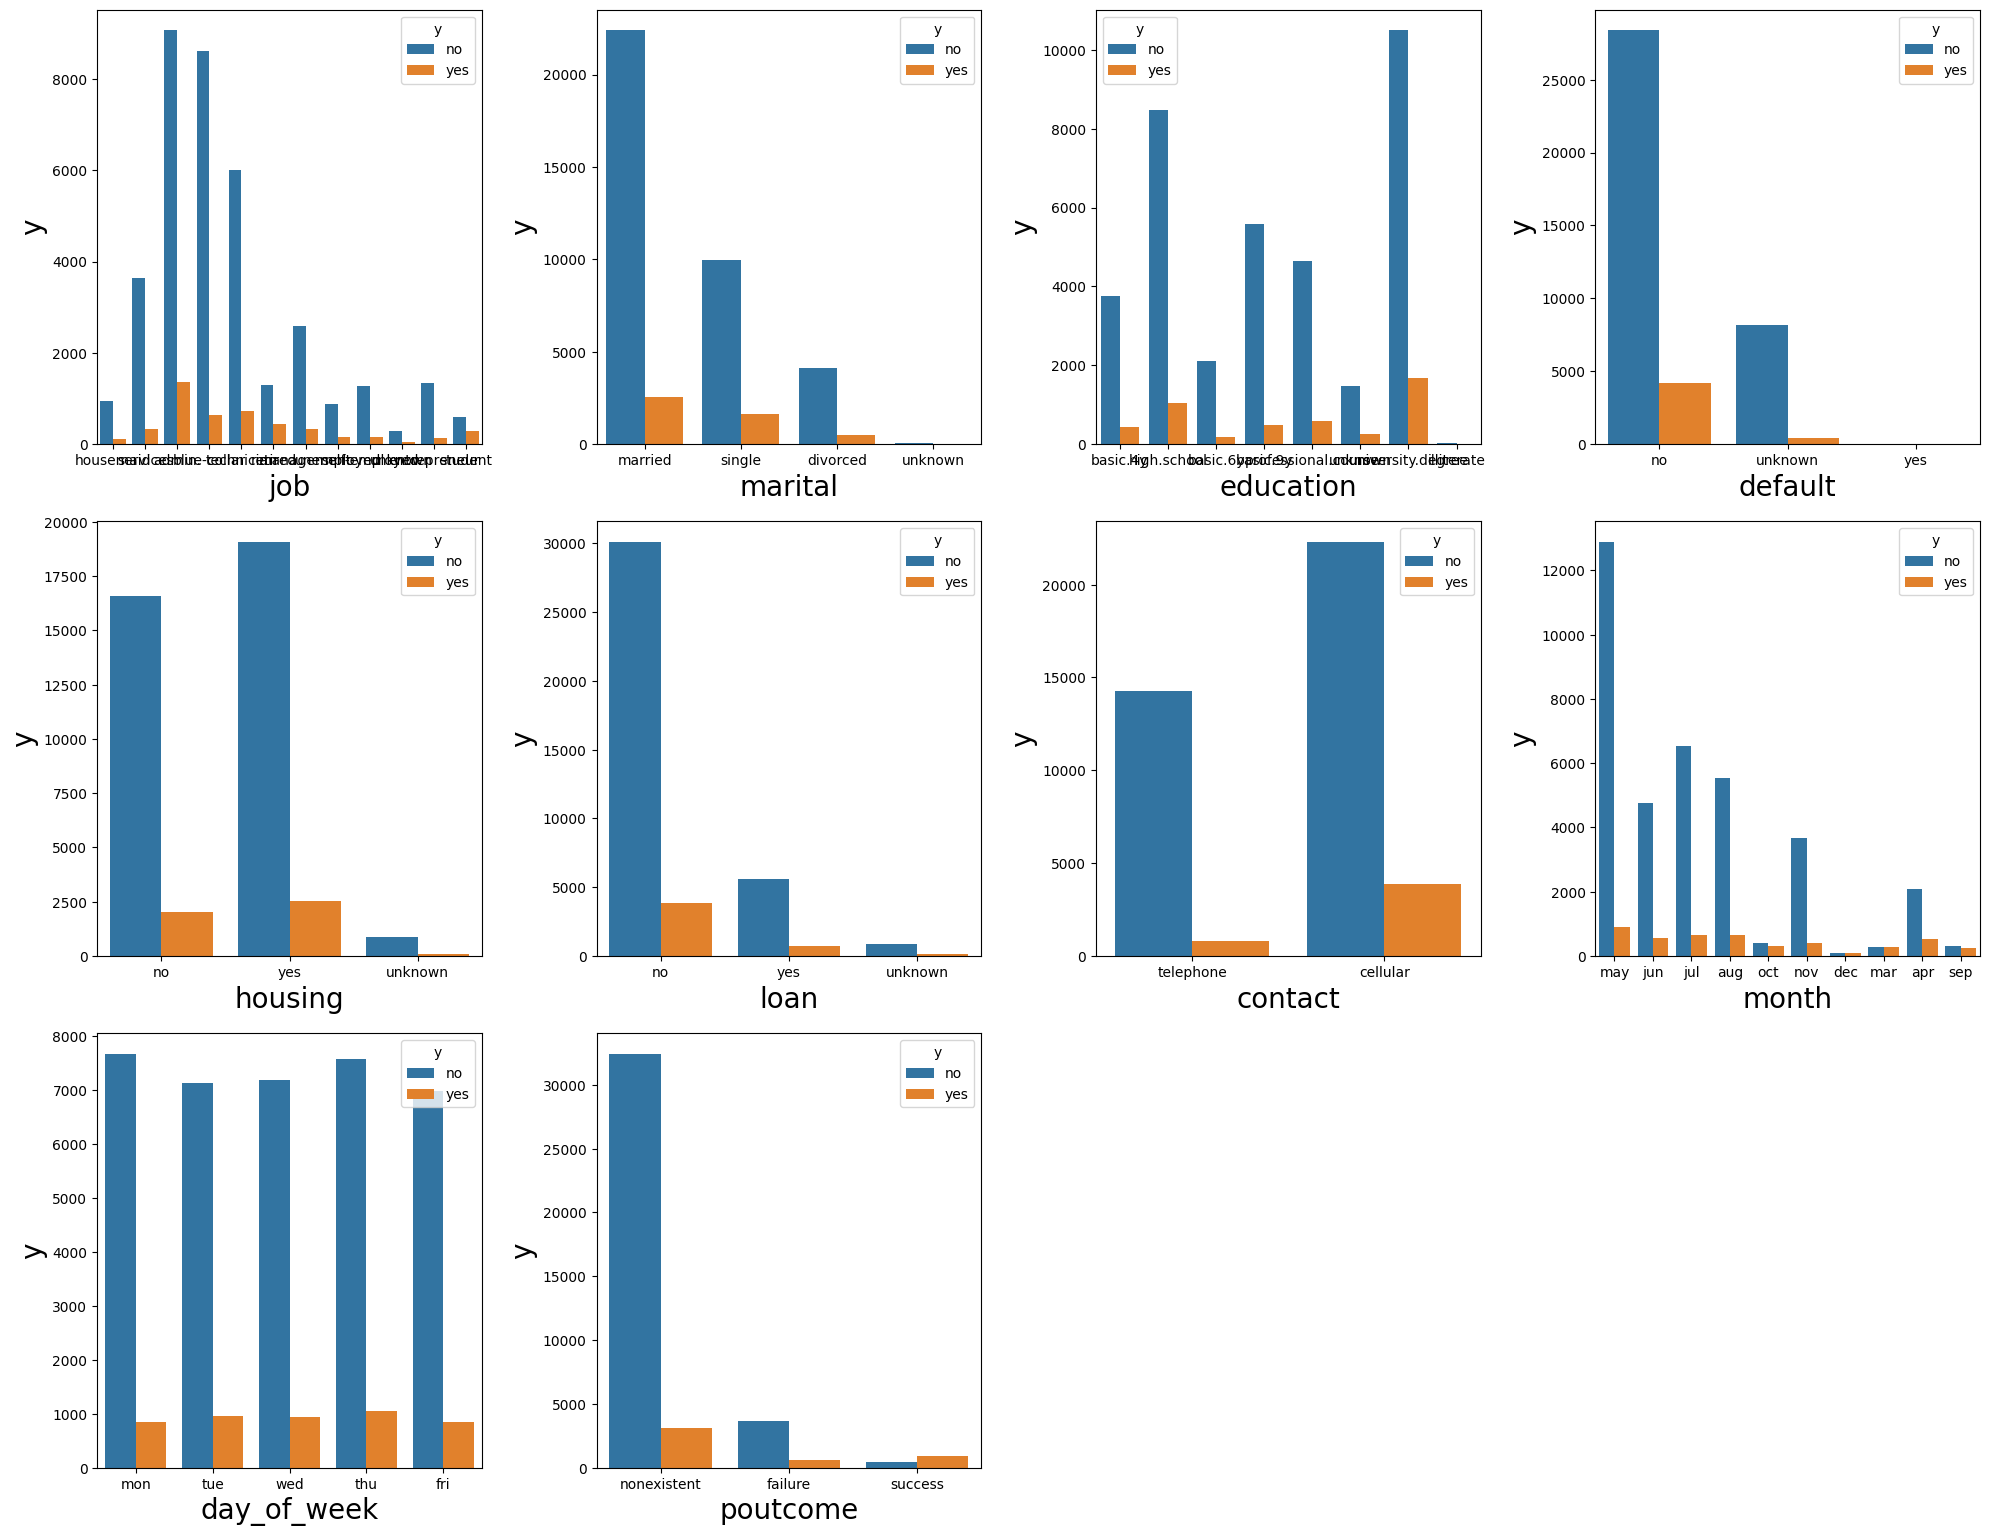

In [13]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data1[column],hue=data['y'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('y',fontsize=20)
    plotnumber+=1
plt.tight_layout()

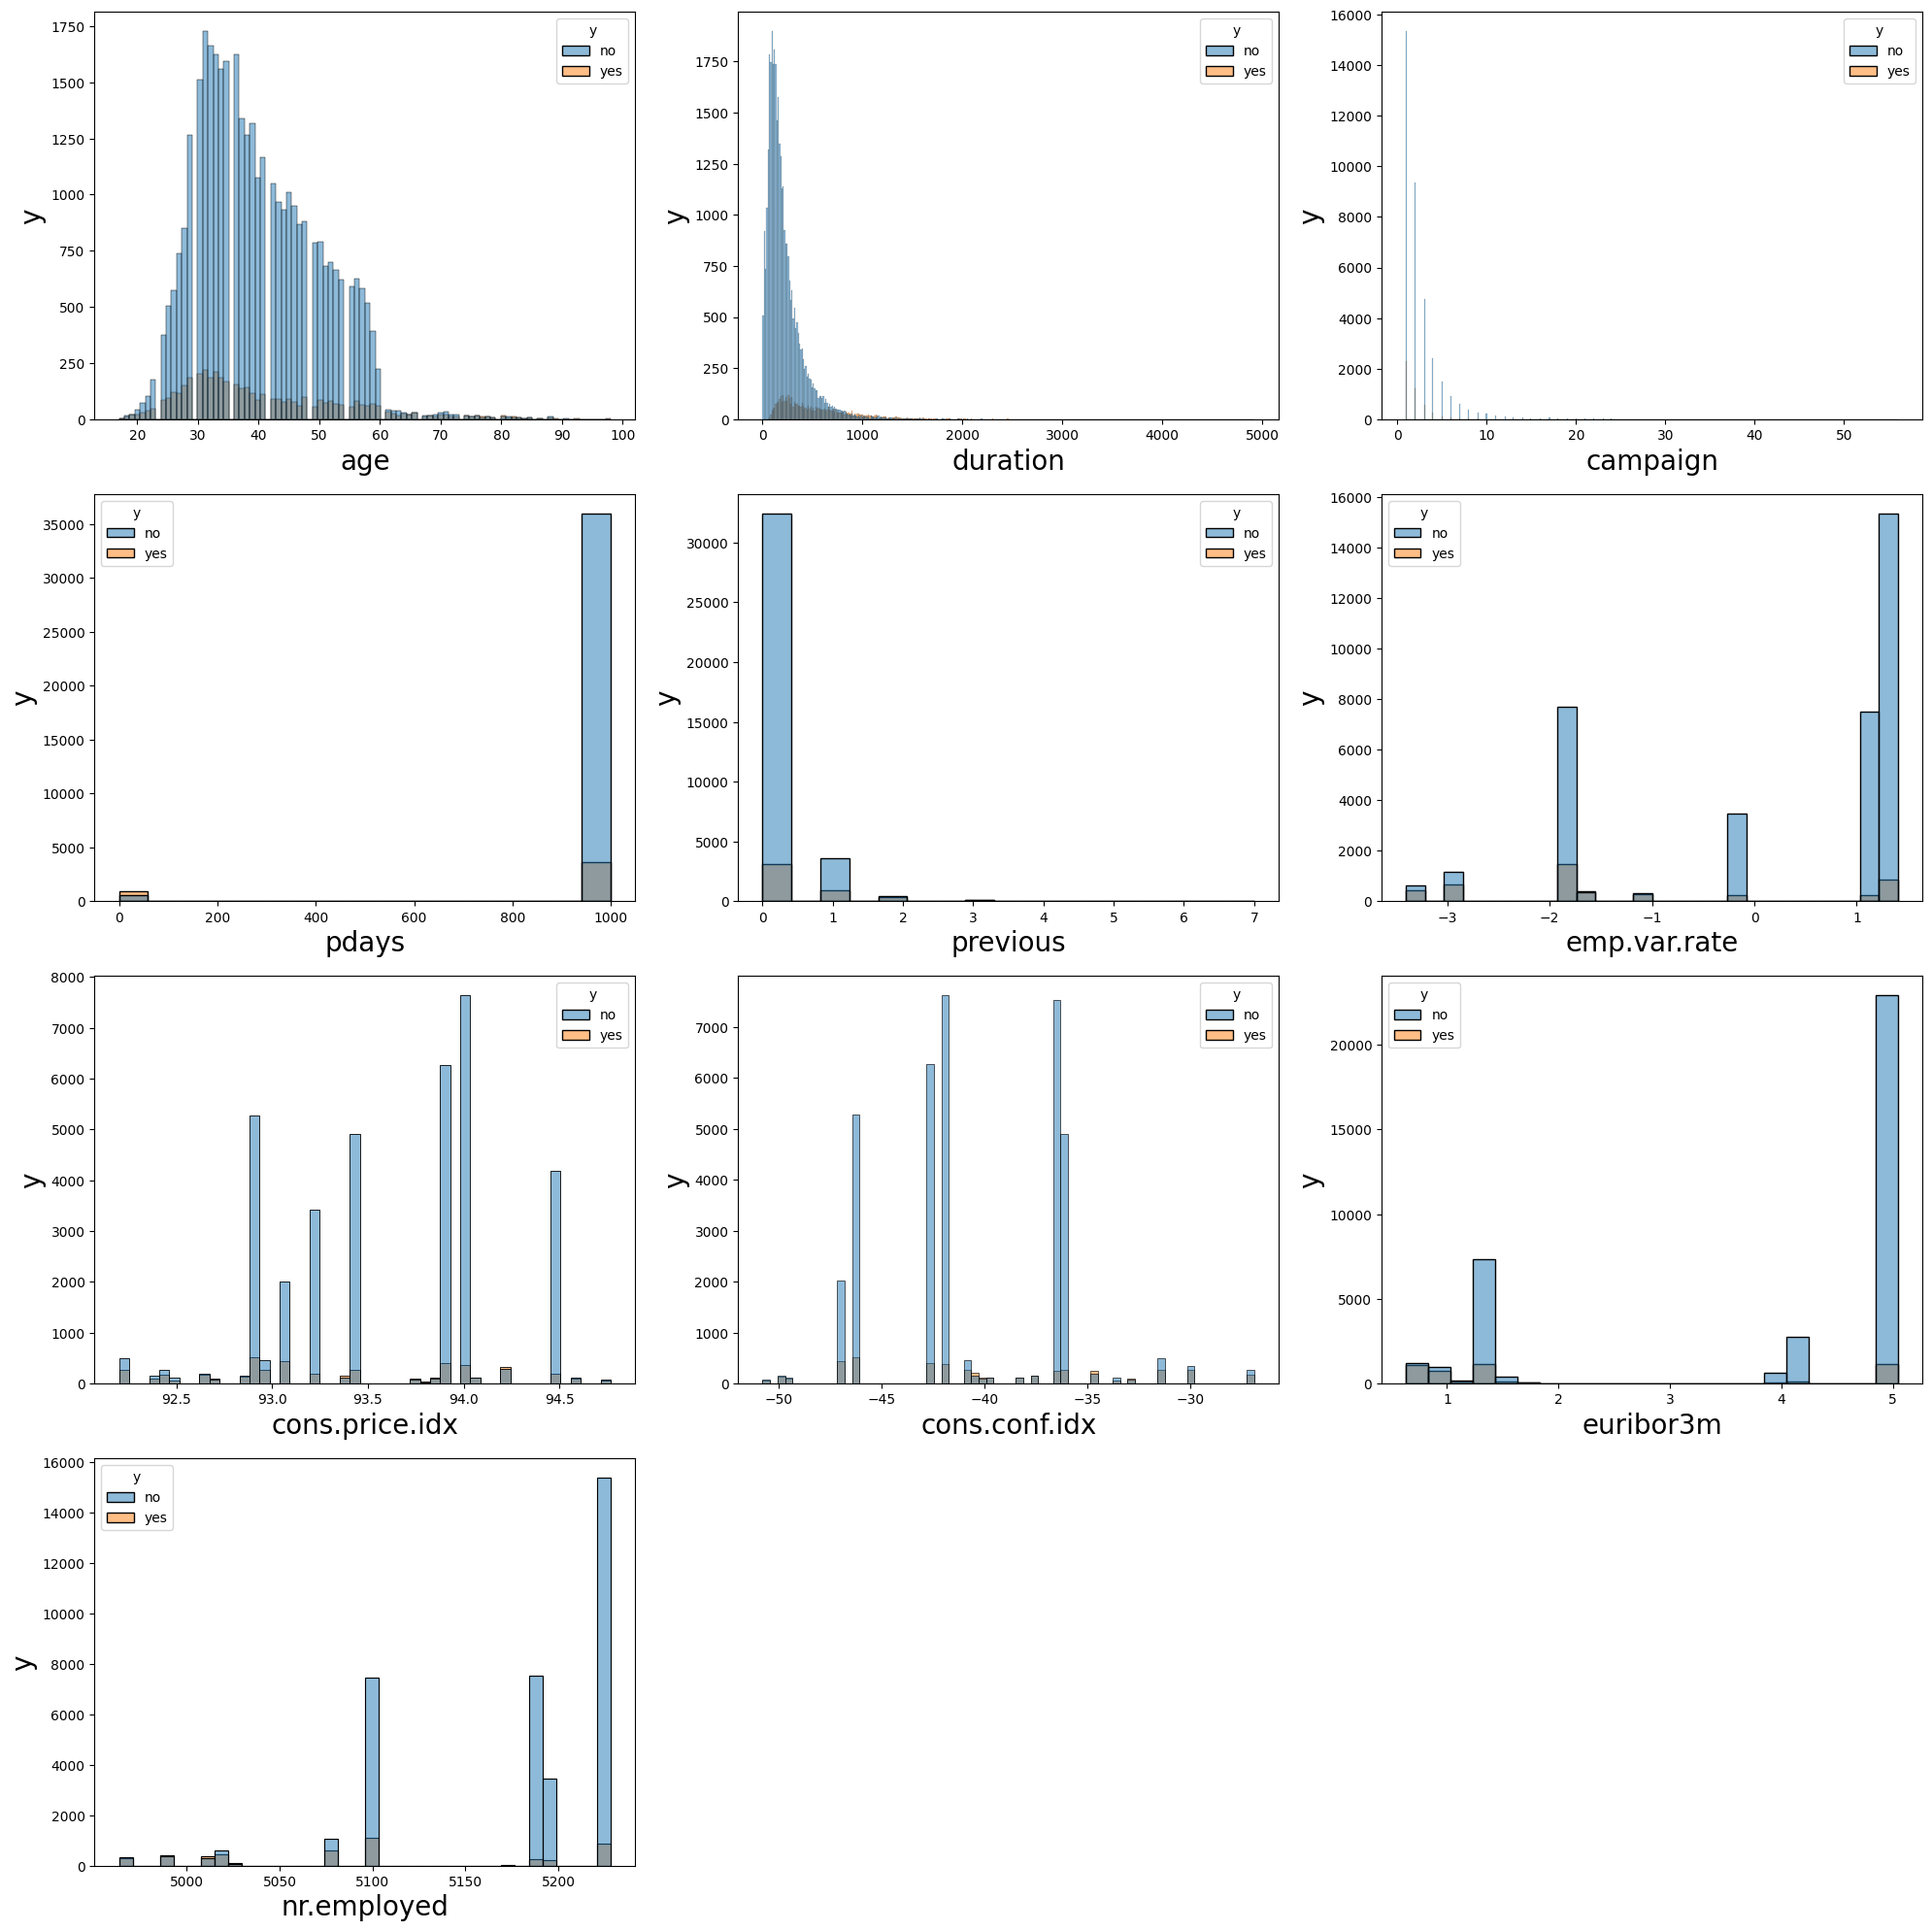

In [14]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in data2:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(x=data2[column],hue=data['y'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('y',fontsize=20)
    plotnumber+=1
plt.tight_layout()

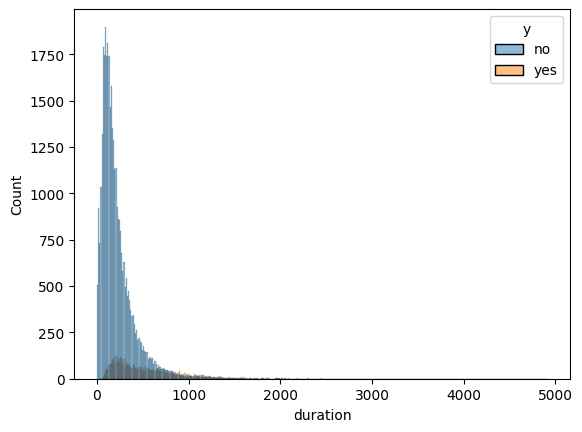

In [15]:
sns.histplot(x='duration',hue='y',data=data)
plt.show()

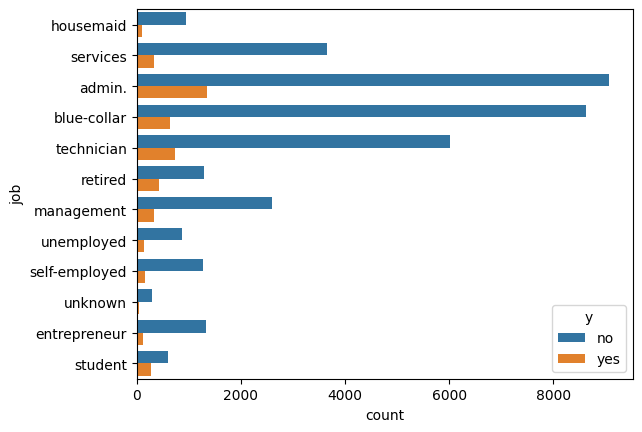

In [16]:
sns.countplot(y='job',hue='y',data=data)
plt.show()

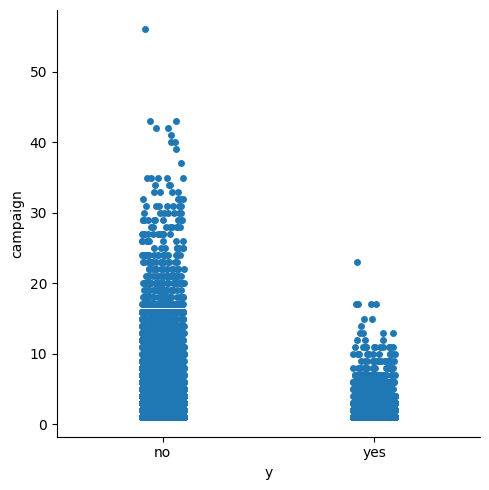

In [17]:
sns.catplot(y='campaign',x='y',data=data)
plt.show()

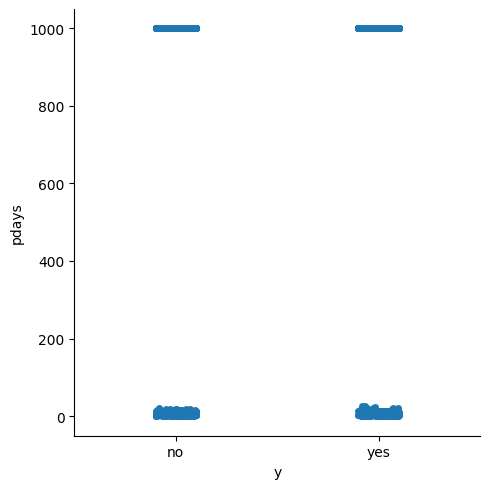

In [18]:
sns.catplot(y='pdays',x='y',data=data)
plt.show()

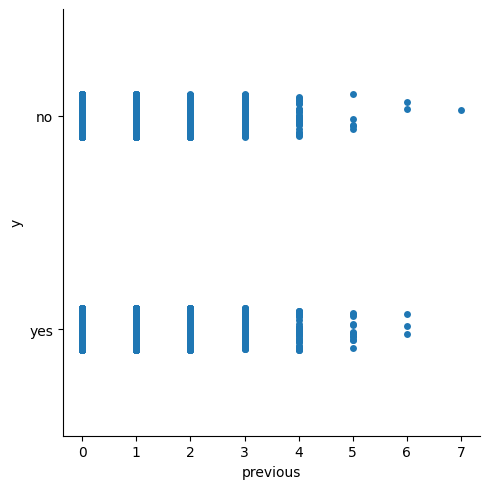

In [19]:
sns.catplot(x='previous',y='y',data=data)
plt.show()

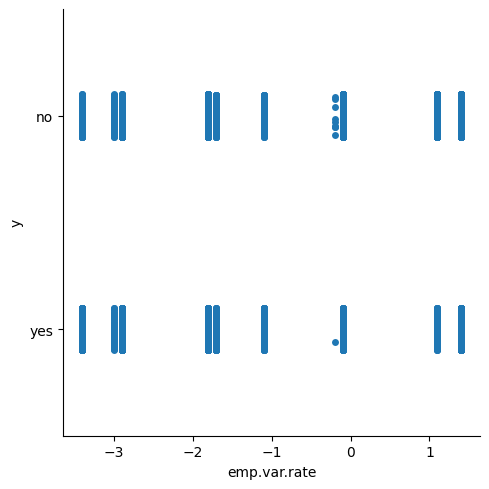

In [20]:
sns.catplot(x='emp.var.rate',y='y',data=data)
plt.show()

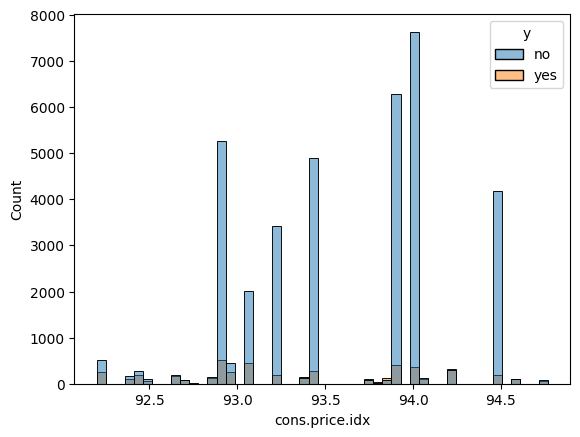

In [21]:
sns.histplot(x='cons.price.idx',hue='y',data=data)
plt.show()

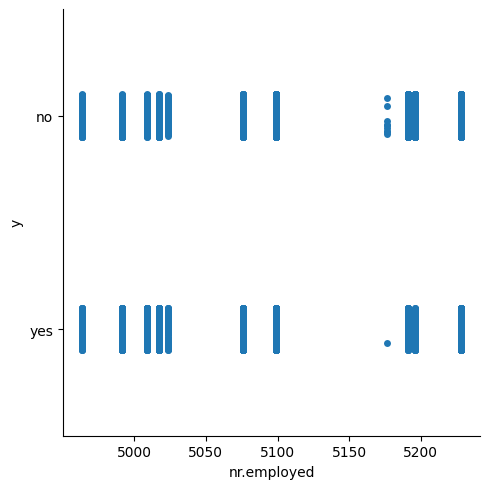

In [22]:
sns.catplot(x='nr.employed',y='y',data=data)
plt.show()

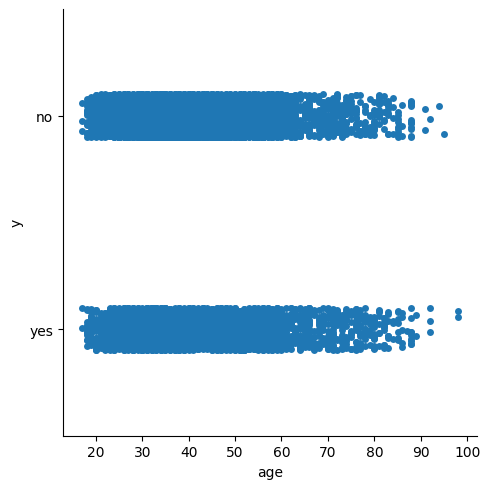

In [23]:
sns.catplot(x='age',y='y',data=data)
plt.show()

## Insights of bivariant analysis

# 5. Data preprocessing and Feature engineering

In [24]:
# Step 1 - Checking missing values
data.isnull().sum()
# There are no null values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [25]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
data.loan.value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [27]:
# Assigning the unknown values with high frequency values
data['job'] = data.loc[:,'job'].replace({'unknown':'admin.'})
data['marital'] = data.loc[:,'marital'].replace({'unknown':'married'})
data['education'] = data.loc[:,'education'].replace({'unknown':'university.degree'})
data['default'] = data.loc[:,'default'].replace({'unknown':'no'})
data['housing'] = data.loc[:,'housing'].replace({'unknown':'yes'})
data['loan'] = data.loc[:,'loan'].replace({'unknown':'no'})

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [29]:
data.marital.value_counts()

marital
married     25008
single      11568
divorced     4612
Name: count, dtype: int64

In [30]:
# Step 2 - Converting categorical data into numerical data
from category_encoders import CountEncoder
fre_enc = CountEncoder(cols=['job','education','contact','poutcome'],normalize=True,return_df=True).fit(data).transform(data)


In [31]:
fre_enc

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.025736,married,0.101389,no,no,no,0.365252,may,mon,261,1,999,0,0.863431,1.1,93.994,-36.4,4.857,5191.0,no
1,57,0.096363,married,0.231014,no,no,no,0.365252,may,mon,149,1,999,0,0.863431,1.1,93.994,-36.4,4.857,5191.0,no
2,37,0.096363,married,0.231014,no,yes,no,0.365252,may,mon,226,1,999,0,0.863431,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0.261047,married,0.055647,no,no,no,0.365252,may,mon,151,1,999,0,0.863431,1.1,93.994,-36.4,4.857,5191.0,no
4,56,0.096363,married,0.231014,no,no,yes,0.365252,may,mon,307,1,999,0,0.863431,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0.041760,married,0.127294,no,yes,no,0.634748,nov,fri,334,1,999,0,0.863431,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,0.224677,married,0.127294,no,no,no,0.634748,nov,fri,383,1,999,0,0.863431,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,0.041760,married,0.337453,no,yes,no,0.634748,nov,fri,189,2,999,0,0.863431,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,0.163713,married,0.127294,no,no,no,0.634748,nov,fri,442,1,999,0,0.863431,-1.1,94.767,-50.8,1.028,4963.6,yes


In [32]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data.marital = lb.fit_transform(data.marital)

In [33]:
data.housing = data.housing.map({'yes':1,'no':0})
data.loan = data.loan.map({'yes':1,'no':0}) # Manual encoding

In [34]:
data.default = data.default.map({'yes':1,'no':0})

In [35]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1,basic.4y,0,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,1,high.school,0,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,1,high.school,0,1,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,1,basic.6y,0,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,1,high.school,0,0,1,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [36]:
data.month = lb.fit_transform(data.month)
data.day_of_week = lb.fit_transform(data.day_of_week)

In [37]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1,basic.4y,0,0,0,telephone,6,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,1,high.school,0,0,0,telephone,6,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,1,high.school,0,1,0,telephone,6,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,1,basic.6y,0,0,0,telephone,6,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,1,high.school,0,0,1,telephone,6,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [38]:
data.drop(['job','education','contact','poutcome'],axis=1,inplace=True)


In [39]:
data.head()

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,0,0,0,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,1,0,0,0,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,1,0,1,0,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,1,0,0,0,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,1,0,0,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [40]:
data.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [41]:
fre_enc.drop(['age', 'marital', 'default', 'housing', 'loan', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],axis=1,inplace=True)

In [42]:
fre_enc

,job,education,contact,poutcome
0,0.025736,0.101389,0.365252,0.863431
1,0.096363,0.231014,0.365252,0.863431
2,0.096363,0.231014,0.365252,0.863431
3,0.261047,0.055647,0.365252,0.863431
4,0.096363,0.231014,0.365252,0.863431
...,...,...,...,...
41183,0.041760,0.127294,0.634748,0.863431
41184,0.224677,0.127294,0.634748,0.863431
41185,0.041760,0.337453,0.634748,0.863431
41186,0.163713,0.127294,0.634748,0.863431


In [43]:
data2 = pd.concat([data,fre_enc],axis=1)

In [44]:
data2

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,education,contact,poutcome
0,56,1,0,0,0,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0.025736,0.101389,0.365252,0.863431
1,57,1,0,0,0,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0.096363,0.231014,0.365252,0.863431
2,37,1,0,1,0,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0.096363,0.231014,0.365252,0.863431
3,40,1,0,0,0,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0.261047,0.055647,0.365252,0.863431
4,56,1,0,0,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0.096363,0.231014,0.365252,0.863431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,1,0,7,0,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,0.041760,0.127294,0.634748,0.863431
41184,46,1,0,0,0,7,0,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0.224677,0.127294,0.634748,0.863431
41185,56,1,0,1,0,7,0,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0.041760,0.337453,0.634748,0.863431
41186,44,1,0,0,0,7,0,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,0.163713,0.127294,0.634748,0.863431


In [45]:
data2['y'] = data2['y'].map({'yes':1,'no':0})

In [46]:
data2.head()

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,education,contact,poutcome
0,56,1,0,0,0,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.025736,0.101389,0.365252,0.863431
1,57,1,0,0,0,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.096363,0.231014,0.365252,0.863431
2,37,1,0,1,0,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.096363,0.231014,0.365252,0.863431
3,40,1,0,0,0,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.261047,0.055647,0.365252,0.863431
4,56,1,0,0,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.096363,0.231014,0.365252,0.863431


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   marital         41188 non-null  int32  
 2   default         41188 non-null  int64  
 3   housing         41188 non-null  int64  
 4   loan            41188 non-null  int64  
 5   month           41188 non-null  int32  
 6   day_of_week     41188 non-null  int32  
 7   duration        41188 non-null  int64  
 8   campaign        41188 non-null  int64  
 9   pdays           41188 non-null  int64  
 10  previous        41188 non-null  int64  
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  object 
dtypes: float64(5), int32(3), int64(

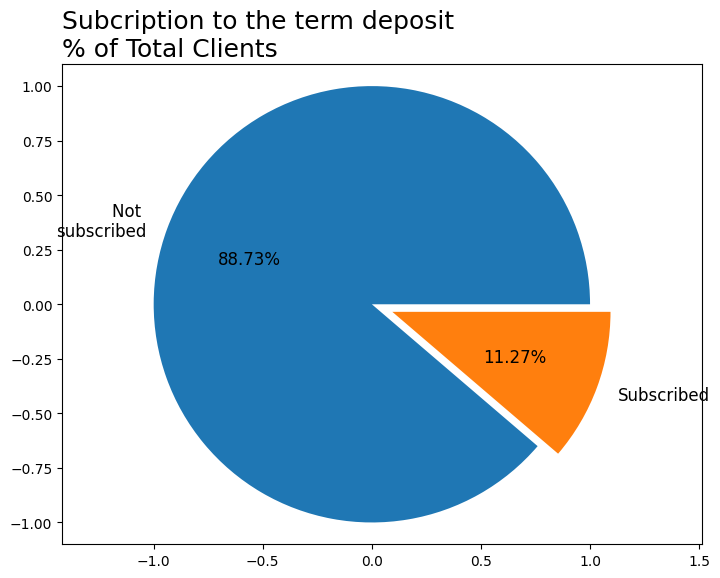

In [48]:
# Pie chart
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)

fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(data['y'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')
plt.show()

* Insight: Through the pie chart, it is observed that out of all the total clients only 11.27% subscribed for the term deposits and the rest didn't.

In [49]:
df = data2[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]


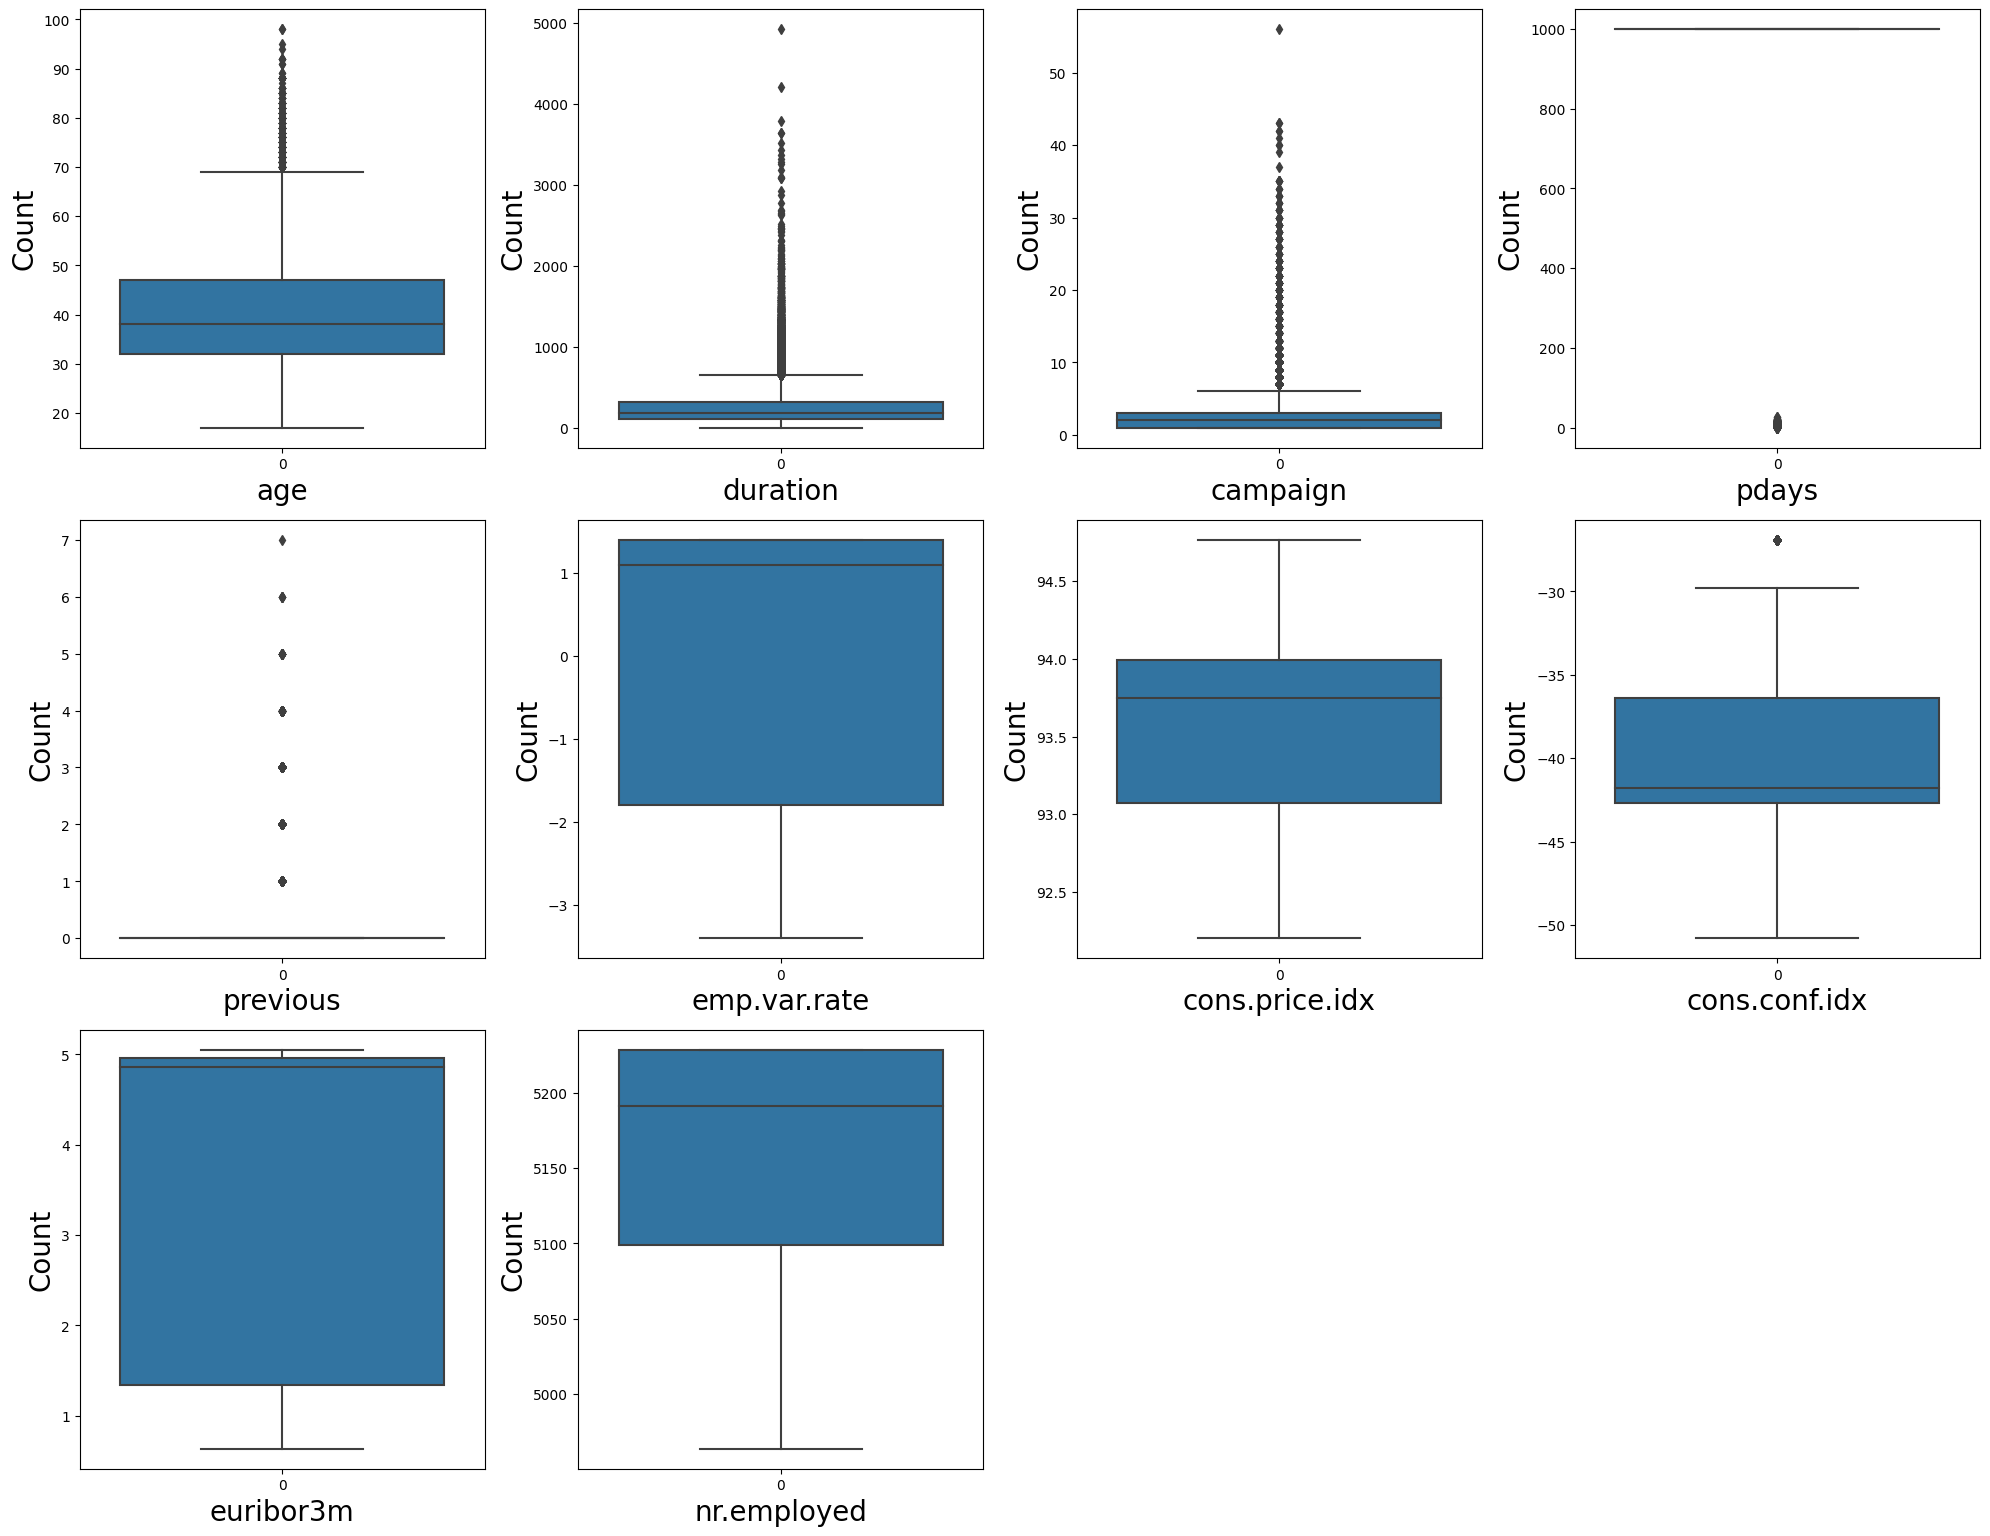

In [50]:
# Step 3 - Checking the outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [51]:
# Outliers found in age,duration,campaign,pdays,previous,cons.cof.idx

<Axes: xlabel='age', ylabel='Density'>

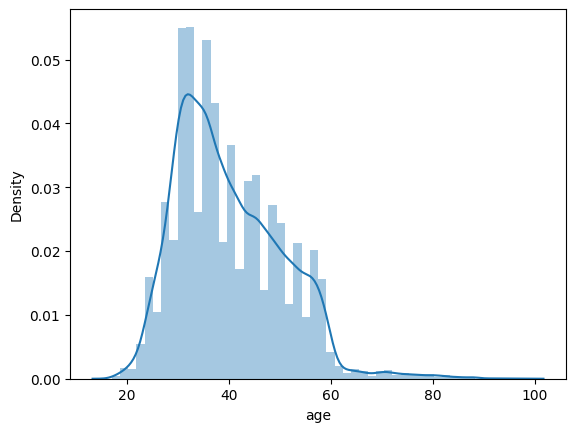

In [52]:
sns.distplot(data2.age) # Checking normal distribution

## Handling age outliers

In [53]:
upp_lim = data2.age.mean()+3*data2.age.std()
upp_lim

71.28781034874618

In [54]:
low_lim = data2.age.mean()-3*data2.age.std()
low_lim

8.760310463140776

In [55]:
len(data2.loc[data2['age']>upp_lim])


369

In [56]:
369/41188

0.008958920073807905

In [57]:
data2.loc[data2['age']>upp_lim,'age']=data.age.median()

<Axes: >

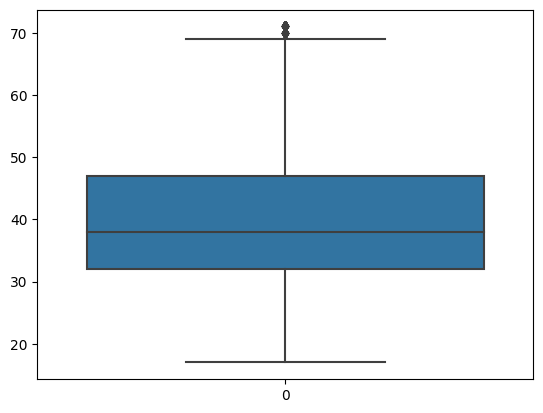

In [58]:
sns.boxplot(data2.age)

### Handling outliers of duration

<Axes: xlabel='duration', ylabel='Density'>

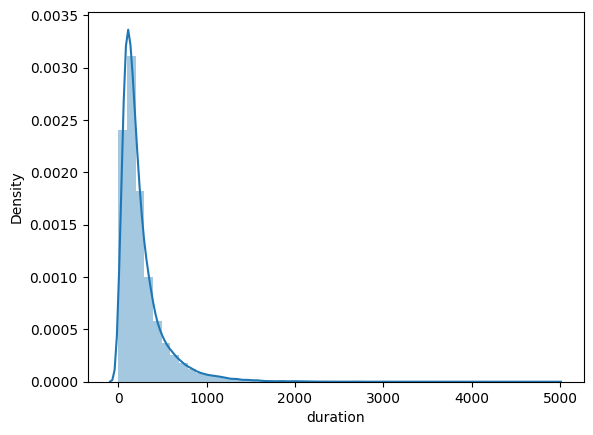

In [59]:
sns.distplot(data2.duration)
# By looking at the graph we can see that there is high peak ie high kurtosis so here we use IQR 

In [60]:
from scipy import stats

In [61]:
IQR = stats.iqr(data2.duration,interpolation='midpoint')
IQR

217.0

In [62]:
Q1 = data2.duration.quantile(0.25)
Q3 = data2.duration.quantile(0.75)
max_lim = Q3+1.5*IQR
min_lim = Q1-1.5*IQR

In [63]:
max_lim

644.5

In [64]:
min_lim

-223.5

In [65]:
len(data2.loc[data2['duration']>max_lim])/data2.shape[0]
# Here 7.1% of the data is above upper limit so we dont handle this feature because the percentage of outliers is >5%

0.07193842866854423

In [66]:
data2.loc[data2['duration']>max_lim,'duration']=data.duration.median()

### Handling outliers of campaign

<Axes: xlabel='campaign', ylabel='Density'>

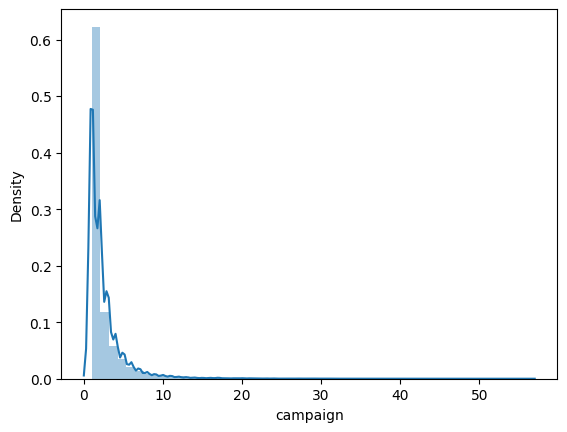

In [67]:
sns.distplot(data2.campaign)
# By looking at the graph we can see that there is high peak ie high kurtosis so here we use IQR 

In [68]:
IQR = stats.iqr(data2.campaign,interpolation='midpoint')
IQR

2.0

In [69]:
Q1 = data2.campaign.quantile(0.25)
Q3 = data2.campaign.quantile(0.75)
max_lim = Q3+1.5*IQR
min_lim = Q1-1.5*IQR

In [70]:
max_lim

6.0

In [71]:
min_lim

-2.0

In [72]:
len(data2.loc[data2['campaign']>max_lim])/data2.shape[0]
# Not handling because it represents the trend

0.058415072351170244

In [73]:
data2.loc[data2['campaign']>max_lim,'campaign']=data.campaign.median()

### Handling outliers of pdays

<Axes: xlabel='pdays', ylabel='Density'>

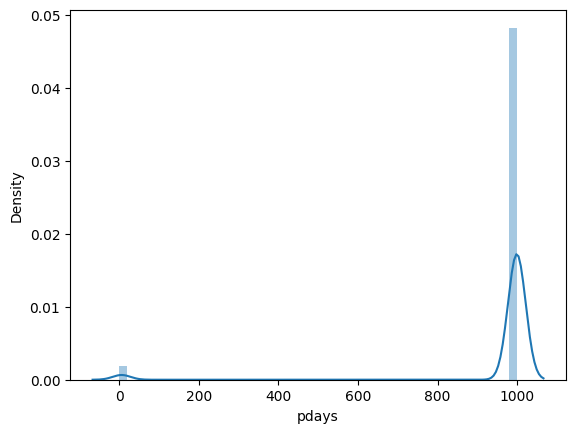

In [74]:
sns.distplot(data2.pdays)
# By looking at the graph we can see that there is high skewness  so here we use IQR 

In [75]:
IQR = stats.iqr(data2.pdays,interpolation='midpoint')
IQR

0.0

In [76]:
Q1 = data2.pdays.quantile(0.25)
Q3 = data2.pdays.quantile(0.75)
max_lim = Q3+1.5*IQR
min_lim = Q1-1.5*IQR

In [77]:
min_lim

999.0

In [78]:
max_lim

999.0

In [79]:
len(data2.loc[data2['pdays']<min_lim])/data2.shape[0]
# Not handing because of no outliers

0.036782558026609694

In [80]:
data2.loc[data2['pdays']<min_lim,'pdays']=data.pdays.median()

### Handling outliers of previous

<Axes: xlabel='previous', ylabel='Density'>

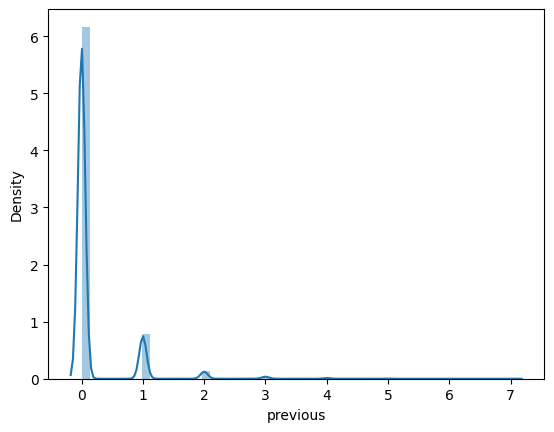

In [81]:
sns.distplot(data2.previous)
# By looking at the graph we can see that there is high peak ie high kurtosis so here we use IQR 

In [82]:
IQR = stats.iqr(data2.previous,interpolation='midpoint')
IQR

0.0

In [83]:
Q1 = data2.previous.quantile(0.25)
Q3 = data2.previous.quantile(0.75)
max_lim = Q3+1.5*IQR
min_lim = Q1-1.5*IQR

In [84]:
max_lim

0.0

In [85]:
min_lim

0.0

In [86]:
len(data2.loc[data2['previous']>max_lim])/data2.shape[0]
# Not handling because it is >5%

0.1365689035641449

### Handling of cons.conf.idx

<Axes: xlabel='cons.conf.idx', ylabel='Density'>

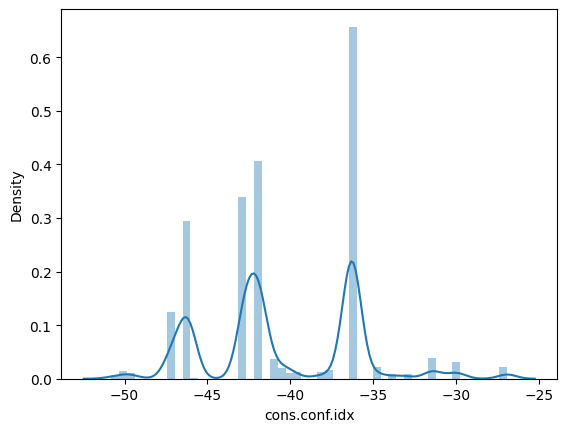

In [87]:
sns.distplot(data2['cons.conf.idx'])

In [88]:
IQR = stats.iqr(data2['cons.conf.idx'],interpolation='midpoint')
IQR

6.300000000000004

In [89]:
Q1 = data2['cons.conf.idx'].quantile(0.25)
Q3 = data2['cons.conf.idx'].quantile(0.75)
max_lim = Q3+1.5*IQR
min_lim = Q1-1.5*IQR

In [90]:
max_lim

-26.949999999999992

In [91]:
min_lim

-52.150000000000006

In [92]:
len(data2.loc[data2['cons.conf.idx']>max_lim])/data2.shape[0]

0.010852675536564048

In [93]:
data2.loc[data2['cons.conf.idx']>max_lim,'cons.conf.idx']=data2['cons.conf.idx'].median()

# 6.Scaling the data

In [94]:
data2.head()

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,education,contact,poutcome
0,56,1,0,0,0,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.025736,0.101389,0.365252,0.863431
1,57,1,0,0,0,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.096363,0.231014,0.365252,0.863431
2,37,1,0,1,0,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.096363,0.231014,0.365252,0.863431
3,40,1,0,0,0,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.261047,0.055647,0.365252,0.863431
4,56,1,0,0,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.096363,0.231014,0.365252,0.863431


In [95]:
from sklearn.preprocessing import RobustScaler
r_scale= RobustScaler()
data2[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]=r_scale.fit_transform(data2[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']])

In [96]:
data2.head()

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,education,contact,poutcome
0,1.200000,1,0,0,0,6,1,0.496933,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.025736,0.101389,0.365252,0.863431
1,1.266667,1,0,0,0,6,1,-0.190184,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.096363,0.231014,0.365252,0.863431
2,-0.066667,1,0,1,0,6,1,0.282209,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.096363,0.231014,0.365252,0.863431
3,0.133333,1,0,0,0,6,1,-0.177914,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.261047,0.055647,0.365252,0.863431
4,1.200000,1,0,0,1,6,1,0.779141,-0.5,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0,0.096363,0.231014,0.365252,0.863431


<Axes: xlabel='cons.conf.idx', ylabel='Density'>

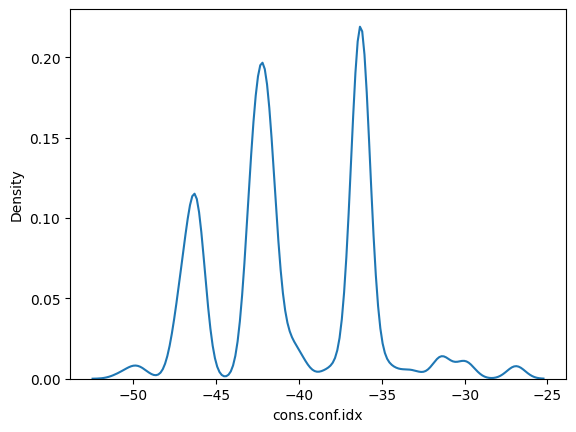

In [97]:
sns.kdeplot(data['cons.conf.idx'])

<Axes: xlabel='cons.conf.idx', ylabel='Density'>

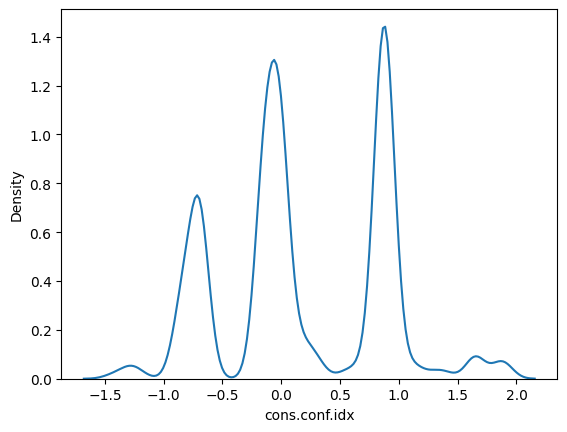

In [98]:
sns.kdeplot(data2['cons.conf.idx'])

# 7.Feature Selection

In [99]:
# Checking redundant features
data2.describe()

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job,education,contact,poutcome
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.0,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.110652,1.168884,0.000073,0.547878,0.151695,4.230868,2.004613,0.132404,0.020807,0.0,0.172963,-0.318161,-0.188613,0.180269,-0.341639,-0.185768,0.112654,0.165656,0.218362,0.536314,0.757282
std,0.649382,0.603589,0.008534,0.497708,0.358729,2.320025,1.397575,0.834251,0.621181,0.0,0.494901,0.490925,0.629859,0.699210,0.479527,0.560089,0.316173,0.086770,0.097532,0.129764,0.267138
min,-1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.104294,-0.500000,0.0,0.000000,-1.406250,-1.684440,-1.428571,-1.167542,-1.762791,0.000000,0.021244,0.000437,0.365252,0.033335
25%,-0.400000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,-0.478528,-0.500000,0.0,0.000000,-0.906250,-0.733406,-0.142857,-0.971247,-0.712403,0.000000,0.070992,0.127294,0.365252,0.863431
50%,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163713,0.231014,0.634748,0.863431
75%,0.600000,2.000000,0.000000,1.000000,0.000000,6.000000,3.000000,0.521472,0.500000,0.0,0.000000,0.093750,0.266594,0.857143,0.028753,0.287597,0.000000,0.261047,0.337453,0.634748,0.863431
max,2.200000,2.000000,1.000000,1.000000,1.000000,9.000000,4.000000,2.846626,2.000000,0.0,7.000000,0.093750,1.107726,1.904762,0.051977,0.287597,1.000000,0.261047,0.337453,0.634748,0.863431


<Axes: >

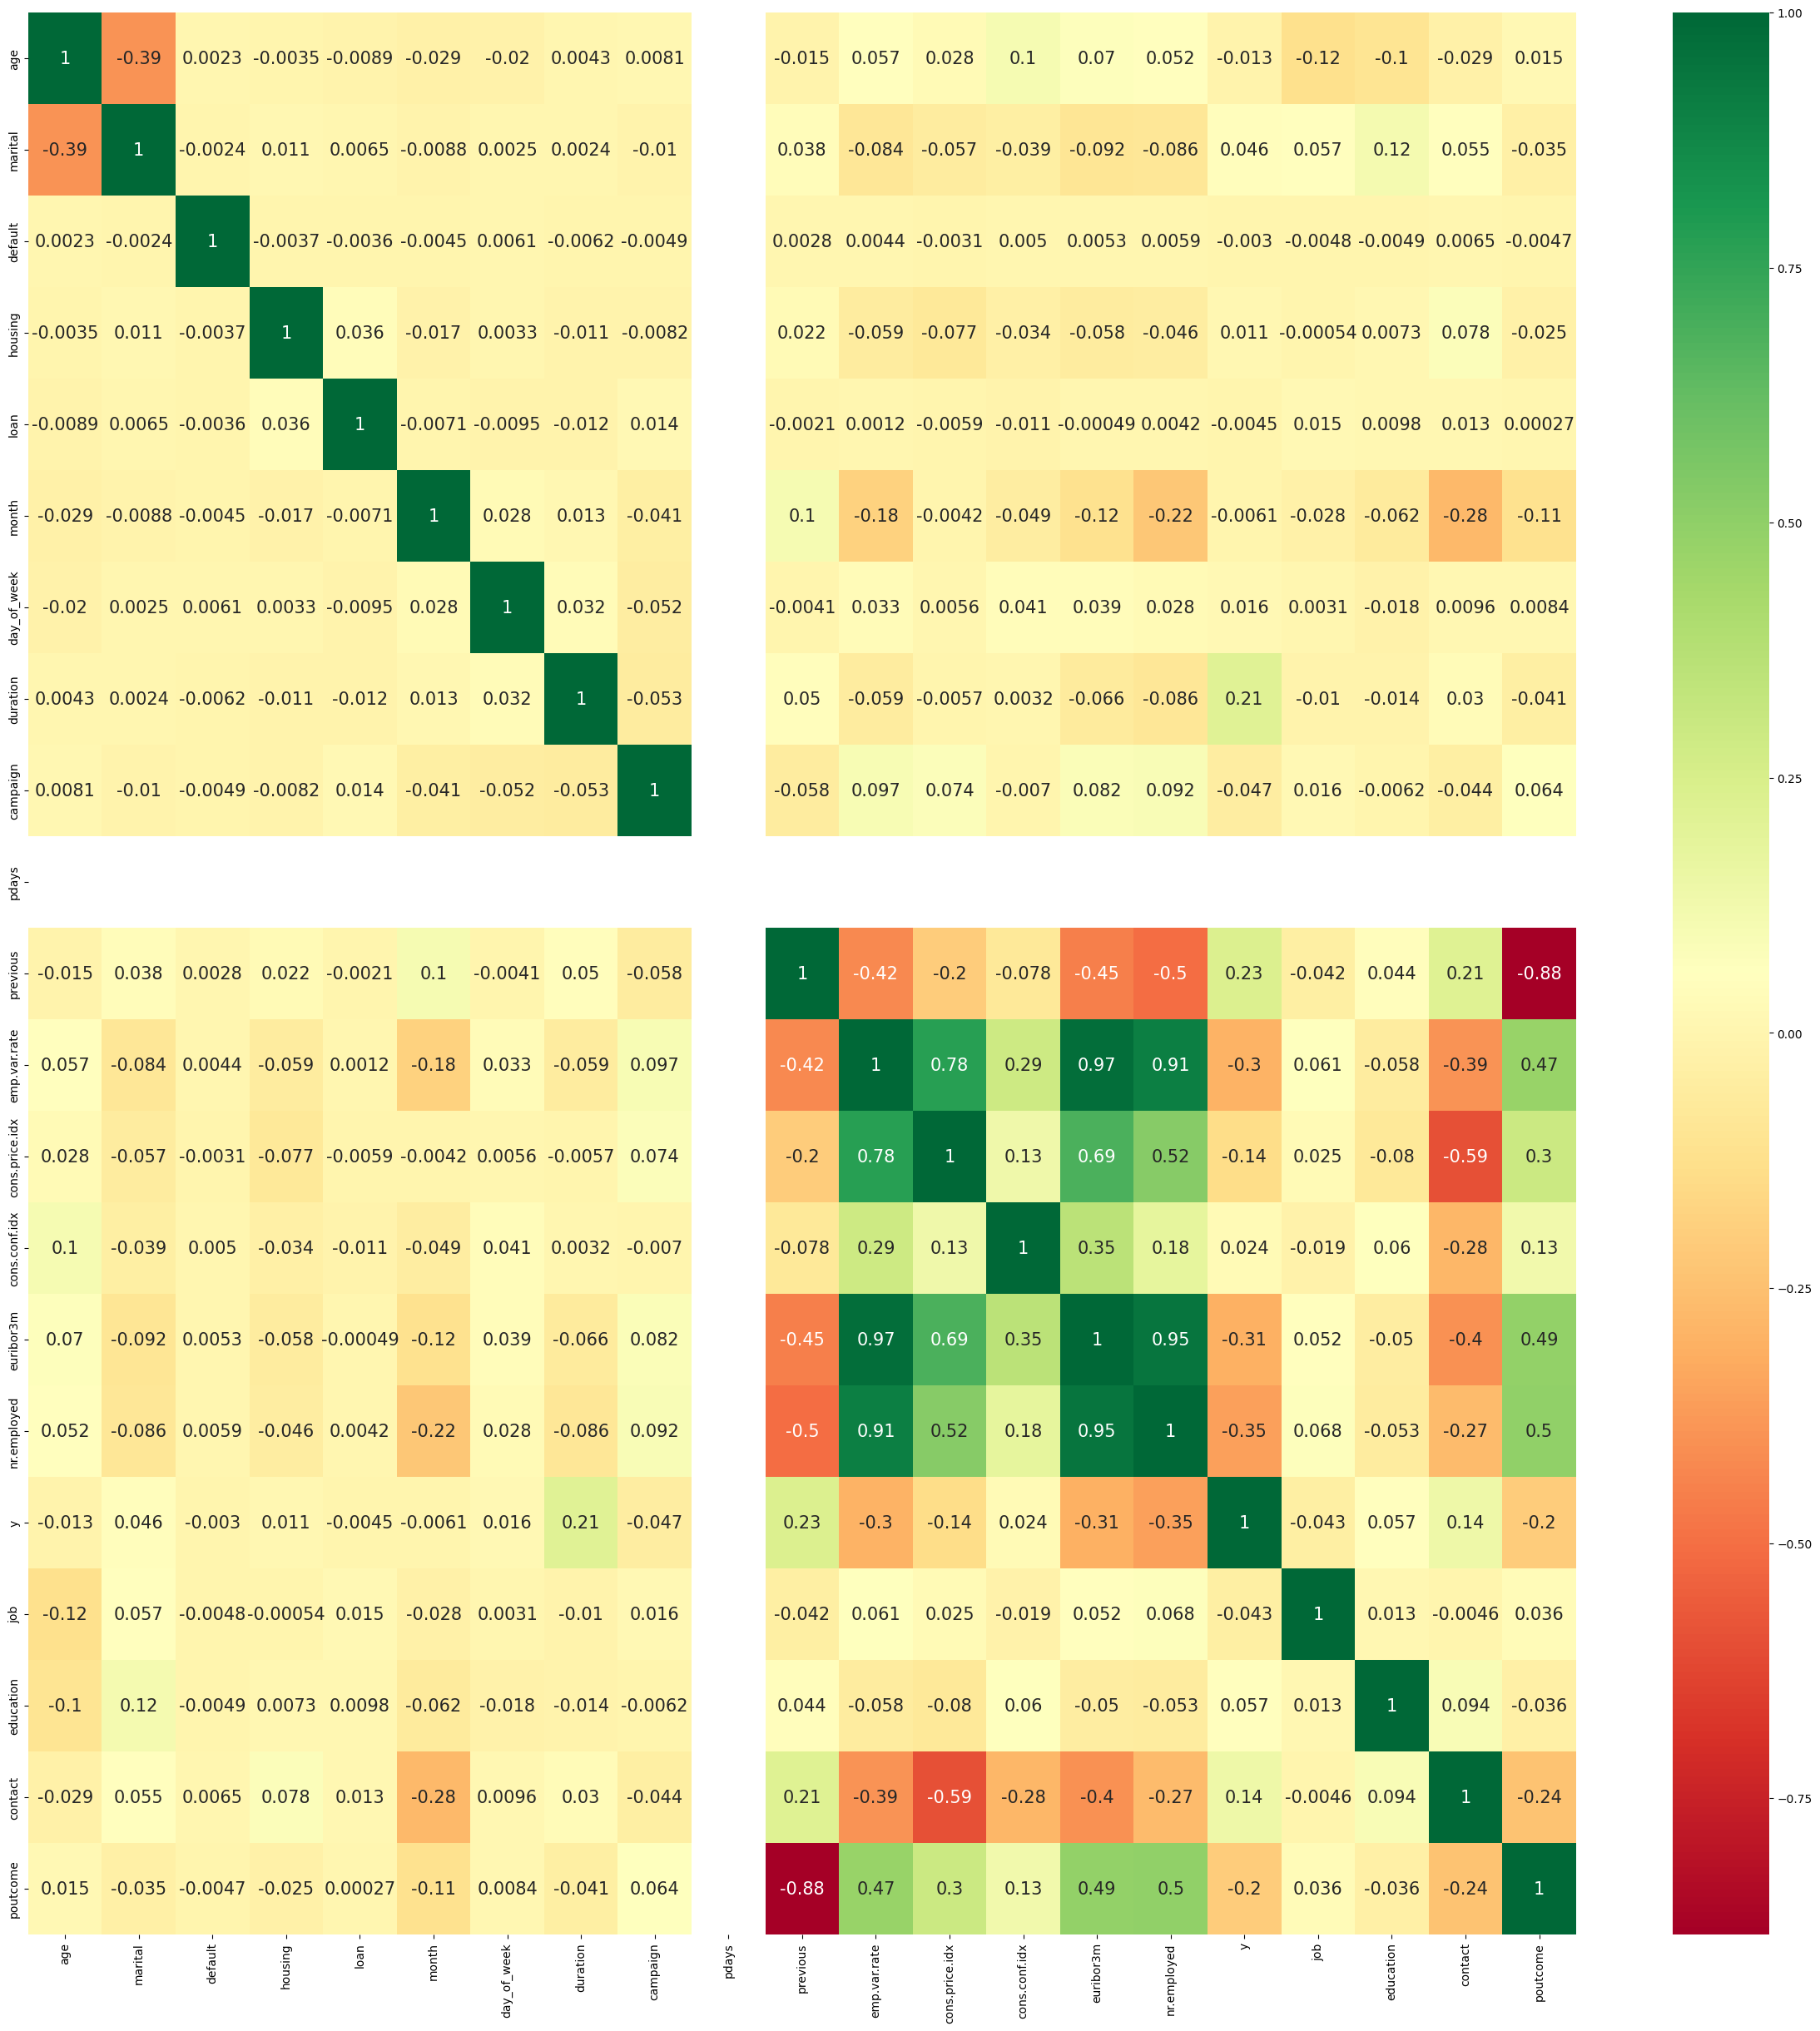

In [100]:
# Checking the correlation
plt.figure(figsize=(30, 30))
sns.heatmap(data2.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [101]:
data2.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job', 'education', 'contact', 'poutcome'],
      dtype='object')

In [102]:
# Defining x and y
X = data2[['age', 'marital', 'default', 'housing', 'loan', 'month', 'day_of_week',
       'duration', 'campaign', 'previous','pdays', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job', 'education', 'contact', 'poutcome']]
y = data2.y

In [103]:
# Balacing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
print(Counter(y_sm))

Counter({0: 36548, 1: 4640})
Counter({0: 36548, 1: 36548})


In [104]:
## Step 2 Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=45,test_size=0.25)

# 8.Model Creation

## 8.1: Logistic Regression Model

In [105]:
## Model creation, linear model import logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() #object of classify logistic regression
lr.fit(X_train,y_train)  ## training of the model

LogisticRegression()

In [106]:
y_pred=lr.predict(X_test)


In [107]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

## Evaluation of model

In [108]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , f1_score , precision_score

In [109]:
#checking accuracy score
acc=accuracy_score(y_test,y_pred)
print(acc)

0.7529276567801247


In [110]:
#checking classification report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      9141
           1       0.77      0.71      0.74      9133

    accuracy                           0.75     18274
   macro avg       0.75      0.75      0.75     18274
weighted avg       0.75      0.75      0.75     18274



In [111]:
#checking confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[7249 1892]
 [2623 6510]]


In [112]:
#checking f1 score
f1score=f1_score(y_test,y_pred)
print(f1score)

0.7425149700598802


In [113]:
#checking precision score
precision=precision_score(y_test,y_pred)
print(precision)

0.7748155201142585


# 8.2:Decision Tree 

In [114]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [115]:
y_predic = dt.predict(X_test)

In [116]:
train_pred = dt.predict(X_train)

In [117]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [118]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27407
           1       1.00      1.00      1.00     27415

    accuracy                           1.00     54822
   macro avg       1.00      1.00      1.00     54822
weighted avg       1.00      1.00      1.00     54822



In [119]:
print(classification_report(y_test,y_predic))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      9141
           1       0.92      0.92      0.92      9133

    accuracy                           0.92     18274
   macro avg       0.92      0.92      0.92     18274
weighted avg       0.92      0.92      0.92     18274



In [120]:
pd.crosstab(y_test,y_predic)

col_0,0,1
y,,
0,8428,713
1,697,8436


In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [123]:
print(f"Best parameters :{best_params})")

Best parameters :{'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [124]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [125]:
tree_cv.best_score_

0.9177298931953469

In [126]:
dt1=DecisionTreeClassifier(criterion='entropy',
                           max_depth=17,min_samples_leaf=1,
                           min_samples_split=3,splitter='best')

In [127]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_split=3)

In [128]:
y_pred = dt1.predict(X_test)

In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9141
           1       0.92      0.93      0.93      9133

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274



In [130]:
pd.crosstab(y_test,y_pred)

col_0,0,1
y,,
0,8425,716
1,645,8488


# 8.3:Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [132]:
y_predict=rf_clf.predict(X_test)

In [133]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      9141
           1       0.94      0.96      0.95      9133

    accuracy                           0.95     18274
   macro avg       0.95      0.95      0.95     18274
weighted avg       0.95      0.95      0.95     18274



In [134]:
pd.crosstab(y_test,y_predict)

col_0,0,1
y,,
0,8612,529
1,324,8809


In [135]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=3, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best paramters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 80})


In [138]:
rf_clf1 = RandomForestClassifier(random_state=50,
                               verbose=3, n_jobs=-1,n_estimators= 200, max_features= 'sqrt',
               max_depth= 50, min_samples_split= 
                                 10,
               min_samples_leaf= 2)

In [139]:
rf_clf1.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 200building tree 2 of 200
building tree 3 of 200
building tree 4 of 200

building tree 5 of 200building tree 6 of 200

building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.0s


building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   14.0s


building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   22.2s finished


RandomForestClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=50, verbose=3)

In [140]:
y_pred = rf_clf1.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.9s finished


In [141]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      9141
           1       0.93      0.96      0.95      9133

    accuracy                           0.95     18274
   macro avg       0.95      0.95      0.95     18274
weighted avg       0.95      0.95      0.95     18274



In [143]:
pd.crosstab(y_test,y_pred)

col_0,0,1
y,,
0,8501,640
1,323,8810


In [144]:
print(f1_score(y_test,y_pred))

0.9481784426626486
